In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
data=pd.read_csv('car_evaluation.csv')
data.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [5]:
cloumns=['price','maintainanace','doors','persons','boot','safety','decision']
data.columns=cloumns
data.head()

,price,maintainanace,doors,persons,boot,safety,decision
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   price          1727 non-null   object
 1   maintainanace  1727 non-null   object
 2   doors          1727 non-null   object
 3   persons        1727 non-null   object
 4   boot           1727 non-null   object
 5   safety         1727 non-null   object
 6   decision       1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [10]:
data.isnull().sum()

price            0
maintainanace    0
doors            0
persons          0
boot             0
safety           0
decision         0
dtype: int64

In [12]:
data.dtypes

price            object
maintainanace    object
doors            object
persons          object
boot             object
safety           object
decision         object
dtype: object

In [21]:
import category_encoders as ce
encode=ce.OrdinalEncoder(cols=['price','maintainanace','doors','persons','boot','safety','decision'])
data=encode.fit_transform(data)
data.head()

C:\Users\vinot\AppData\Local\Programs\Python\Python312\Lib\site-packages\category_encoders\ordinal.py:198: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X[column] = X[column].astype("object").fillna(np.nan).map(col_mapping)
C:\Users\vinot\AppData\Local\Programs\Python\Python312\Lib\site-packages\category_encoders\ordinal.py:198: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X[column] = X[column].astype("object").fillna(np.nan).map(col_mapping)
C:\Users\vinot\AppData\Local\Programs\Python\Python312\Lib\site-packages\category_encoders\ordinal.py:198: Futur

,price,maintainanace,doors,persons,boot,safety,decision
0,1,1,1,1,1,1,1
1,1,1,1,1,1,2,1
2,1,1,1,1,2,3,1
3,1,1,1,1,2,1,1
4,1,1,1,1,2,2,1


In [22]:
x=data.drop(['decision'],axis=1)
y=data['decision']

In [48]:
x.head()


,price,maintainanace,doors,persons,boot,safety
0,1,1,1,1,1,1
1,1,1,1,1,1,2
2,1,1,1,1,2,3
3,1,1,1,1,2,1
4,1,1,1,1,2,2


In [31]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: decision, dtype: int32

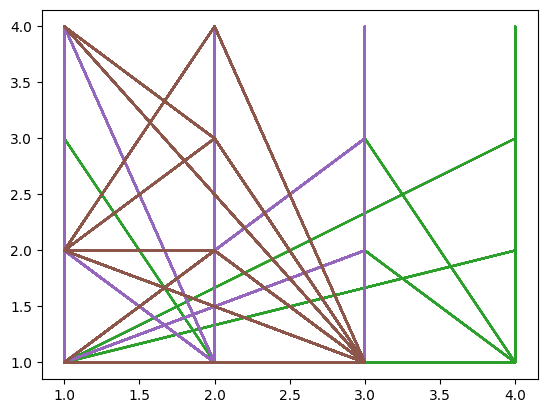

In [23]:
plt.plot(x,y)
plt.show()

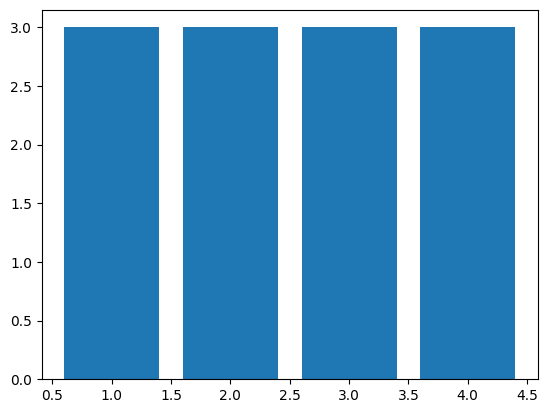

In [57]:
X=data['doors']
Y=data['safety']
plt.bar(X,Y)
plt.show()

In [79]:
### Decision Tree

In [68]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=25)
x_train.shape
y_train.shape

(1295,)

In [75]:
from sklearn.metrics import recall_score, precision_score, accuracy_score, classification_report, f1_score

In [71]:
from sklearn import tree
model=tree.DecisionTreeClassifier(max_depth=10,random_state=30)
model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=10, random_state=30)

In [76]:
train_res=model.predict(x_train)
test_res=model.predict(x_test)
print(classification_report(y_train,train_res))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       903
           2       1.00      0.99      0.99       290
           3       1.00      1.00      1.00        48
           4       0.98      1.00      0.99        54

    accuracy                           1.00      1295
   macro avg       0.99      1.00      1.00      1295
weighted avg       1.00      1.00      1.00      1295



In [77]:
print(classification_report(y_test,test_res))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       306
           2       0.98      0.95      0.96        94
           3       0.94      1.00      0.97        17
           4       0.82      0.93      0.88        15

    accuracy                           0.98       432
   macro avg       0.94      0.97      0.95       432
weighted avg       0.98      0.98      0.98       432



In [80]:
### Random Forest

In [94]:
from sklearn.ensemble import RandomForestClassifier
rf_model=RandomForestClassifier(max_depth=7,random_state=30)
rf_model.fit(x_train,y_train)


RandomForestClassifier(max_depth=7, random_state=30)

In [95]:
rf_train=rf_model.predict(x_train)
rf_test=rf_model.predict(x_test)

In [96]:
print(classification_report(y_train,rf_train))

              precision    recall  f1-score   support

           1       1.00      0.98      0.99       903
           2       0.91      0.99      0.95       290
           3       0.97      0.79      0.87        48
           4       0.95      0.96      0.95        54

    accuracy                           0.98      1295
   macro avg       0.96      0.93      0.94      1295
weighted avg       0.98      0.98      0.98      1295



In [97]:
print(classification_report(y_test,rf_test))

              precision    recall  f1-score   support

           1       0.99      0.96      0.98       306
           2       0.82      0.94      0.88        94
           3       0.90      0.53      0.67        17
           4       0.63      0.80      0.71        15

    accuracy                           0.93       432
   macro avg       0.84      0.81      0.81       432
weighted avg       0.94      0.93      0.93       432



In [131]:
from sklearn.linear_model import LogisticRegression
lrmodel=LogisticRegression(max_iter=3000,random_state=48)
lrmodel.fit(x_train,y_train)

LogisticRegression(max_iter=3000, random_state=48)

In [132]:
pred_train=lrmodel.predict(x_train)
pred_test=lrmodel.predict(x_test)

In [133]:
print(classification_report(y_train,pred_train))

              precision    recall  f1-score   support

           1       0.83      0.92      0.87       903
           2       0.61      0.49      0.54       290
           3       0.42      0.23      0.30        48
           4       0.46      0.31      0.37        54

    accuracy                           0.77      1295
   macro avg       0.58      0.49      0.52      1295
weighted avg       0.75      0.77      0.76      1295



In [134]:
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           1       0.85      0.89      0.87       306
           2       0.58      0.53      0.56        94
           3       0.50      0.29      0.37        17
           4       0.54      0.47      0.50        15

    accuracy                           0.78       432
   macro avg       0.62      0.55      0.57       432
weighted avg       0.76      0.78      0.77       432

